## Telecom Customer Churn Prediction

In [61]:
import numpy as np
import pandas as pd
import os

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# feature scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import cross_val_score,GridSearchCV

# To divide train and test set
from sklearn.model_selection import train_test_split

# To build the models
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# To evaluate the models
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.metrics import plot_confusion_matrix

#To impute missing values
from sklearn.impute import SimpleImputer

In [2]:
pwd

'F:\\HW_Assignment\\HW_04'

In [3]:
data = pd.read_csv('F:\\HW_Assignment\\HW_04\\churn.csv',encoding='utf_8',na_values=[' ','NA', 'NULL','NaN', 'n/a',
    'nan', 'null'])

In [4]:
data.drop('customerID',axis=1,inplace=True)

In [5]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
data['TotalCharges'] = data['TotalCharges'].fillna(value=data['TotalCharges'].mean())

In [9]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('O')
data['TotalCharges'] = data['TotalCharges'].astype('float64')

In [10]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [14]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
cols = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [16]:
data['SeniorCitizen'] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [17]:
for i in cols:
    print(data[i].value_counts())
    print("--------------------")

Male      3555
Female    3488
Name: gender, dtype: int64
--------------------
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64
--------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
--------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
--------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
--------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
--------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
--------------------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
--------------------
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
--------------------
No                     3095
Yes                    2422
No internet service    1526
Name: D

In [18]:
def patch(ax,total):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height*100)/total),ha="center")

In [19]:
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

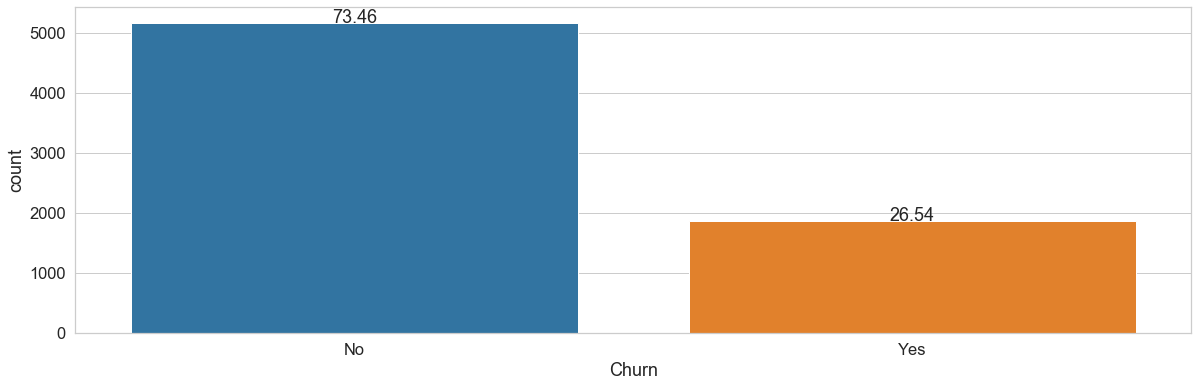

In [65]:
plt.figure(figsize = (20,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5)

ax = sns.countplot(data['Churn']);
patch(ax,len(data))

<Figure size 11520x432 with 0 Axes>

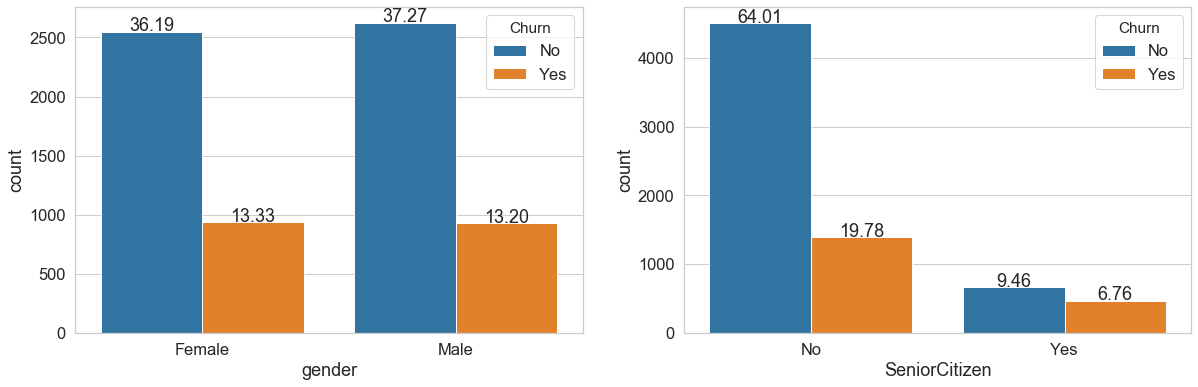

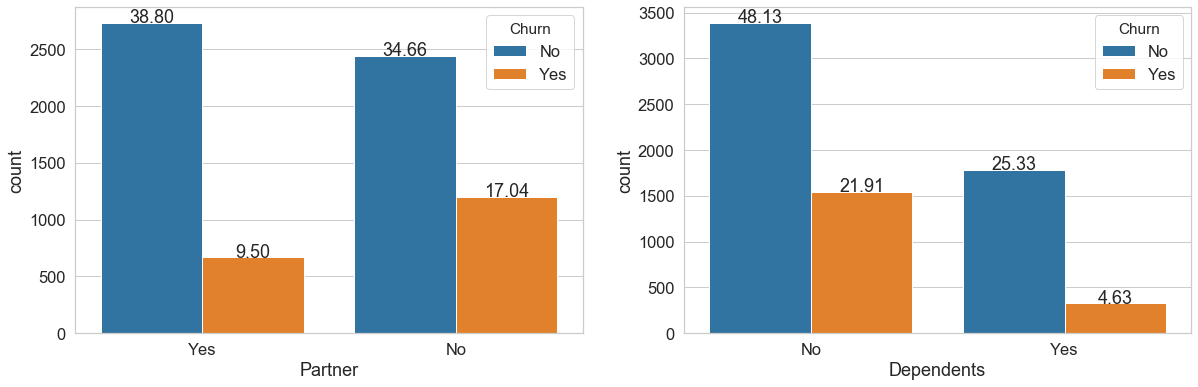

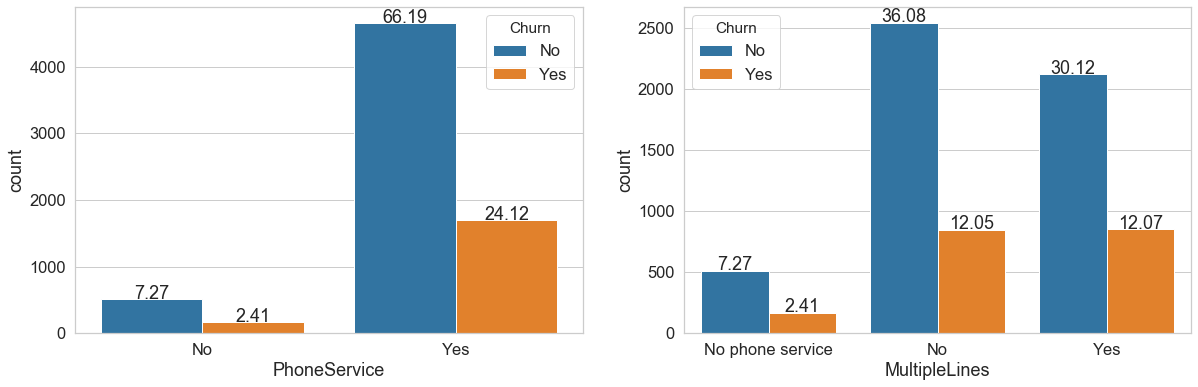

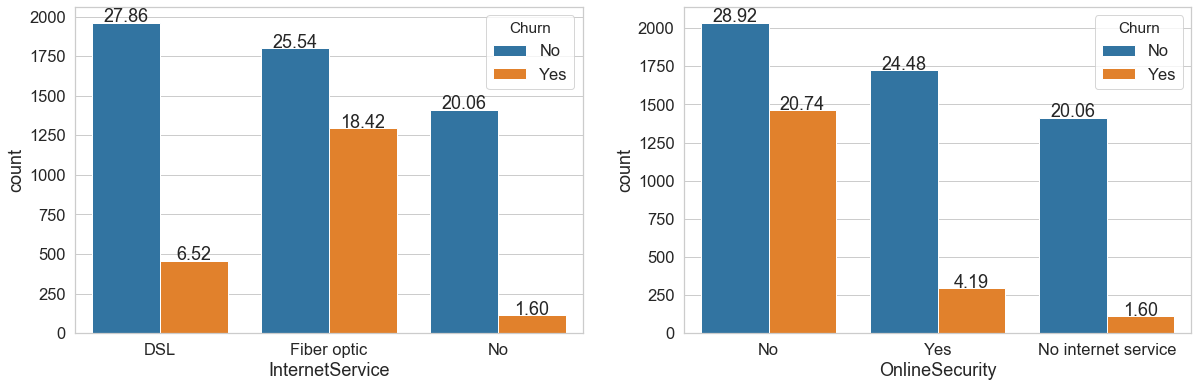

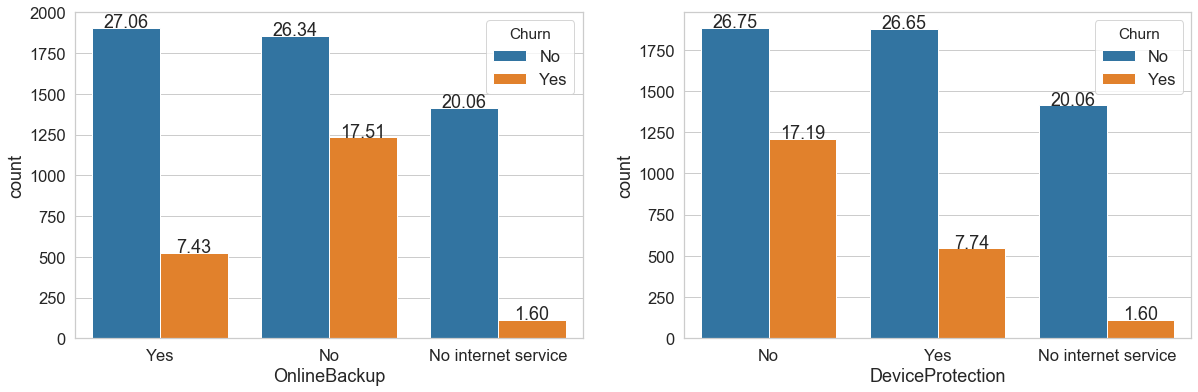

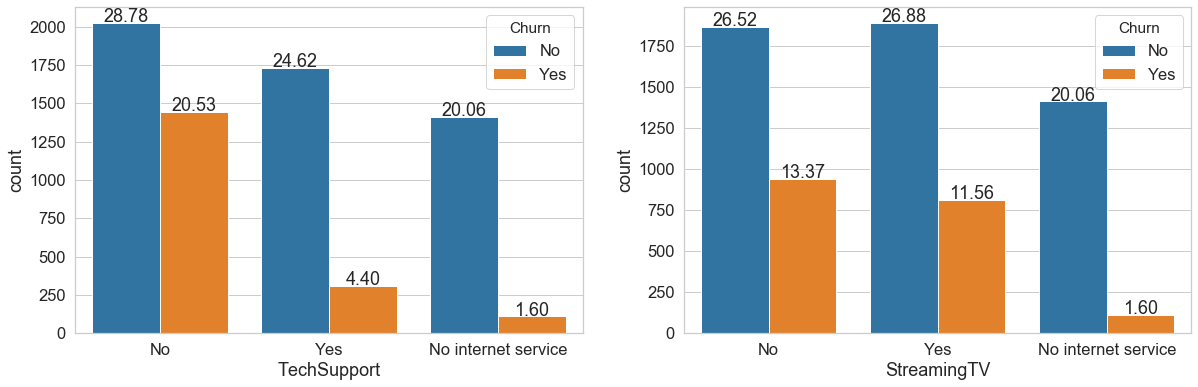

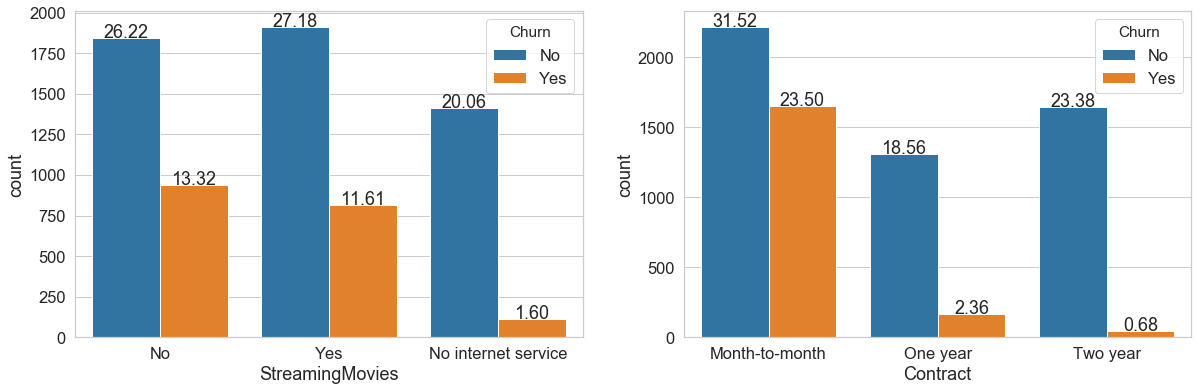

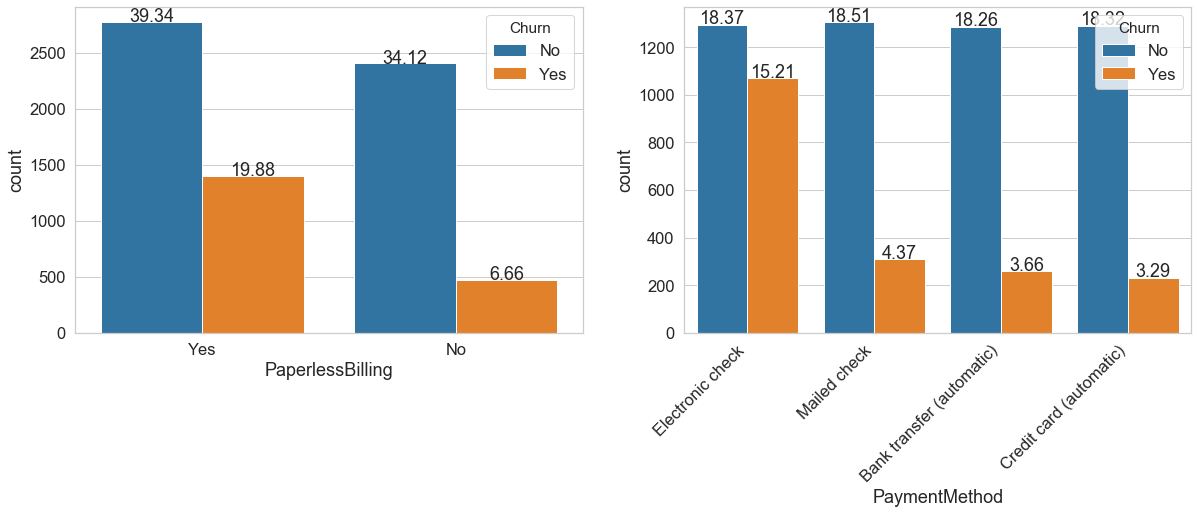

In [20]:
plt.figure(figsize = (160,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5)

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.countplot(data['gender'],hue=data['Churn']);
patch(ax,len(data))

plt.subplot(1,2,2)
ax = sns.countplot(data['SeniorCitizen'],hue=data['Churn']);
patch(ax,len(data))

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.countplot(data['Partner'],hue=data['Churn']);
patch(ax,len(data))

plt.subplot(1,2,2)
ax = sns.countplot(data['Dependents'],hue=data['Churn']);
patch(ax,len(data))

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.countplot(data['PhoneService'],hue=data['Churn']);
patch(ax,len(data))

plt.subplot(1,2,2)
ax = sns.countplot(data['MultipleLines'],hue=data['Churn']);
patch(ax,len(data))

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.countplot(data['InternetService'],hue=data['Churn']);
patch(ax,len(data))

plt.subplot(1,2,2)
ax = sns.countplot(data['OnlineSecurity'],hue=data['Churn']);
patch(ax,len(data))

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.countplot(data['OnlineBackup'],hue=data['Churn']);
patch(ax,len(data))

plt.subplot(1,2,2)
ax = sns.countplot(data['DeviceProtection'],hue=data['Churn']);
patch(ax,len(data))

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.countplot(data['TechSupport'],hue=data['Churn']);
patch(ax,len(data))

plt.subplot(1,2,2)
ax = sns.countplot(data['StreamingTV'],hue=data['Churn']);
patch(ax,len(data))

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.countplot(data['StreamingMovies'],hue=data['Churn']);
patch(ax,len(data))

plt.subplot(1,2,2)
ax = sns.countplot(data['Contract'],hue=data['Churn']);
patch(ax,len(data))

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.countplot(data['PaperlessBilling'],hue=data['Churn']);
patch(ax,len(data))

plt.subplot(1,2,2)
ax = sns.countplot(data['PaymentMethod'],hue=data['Churn'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
patch(ax,len(data))

In [21]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

###### From the above plots we can see that for attributes 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' churn attrition is same because thoses services depends on internet service. So we can replace  'No internet service' value with 'No' in those attributes for our analysis

In [22]:
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [23]:
replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [24]:
def value_r(x):
    if x == 'No internet service':
        return 'No'
    else: pass

In [25]:
for i in replace_cols:
    data[i] = data[i].replace({'No internet service' : 'No'})

<Figure size 11520x432 with 0 Axes>

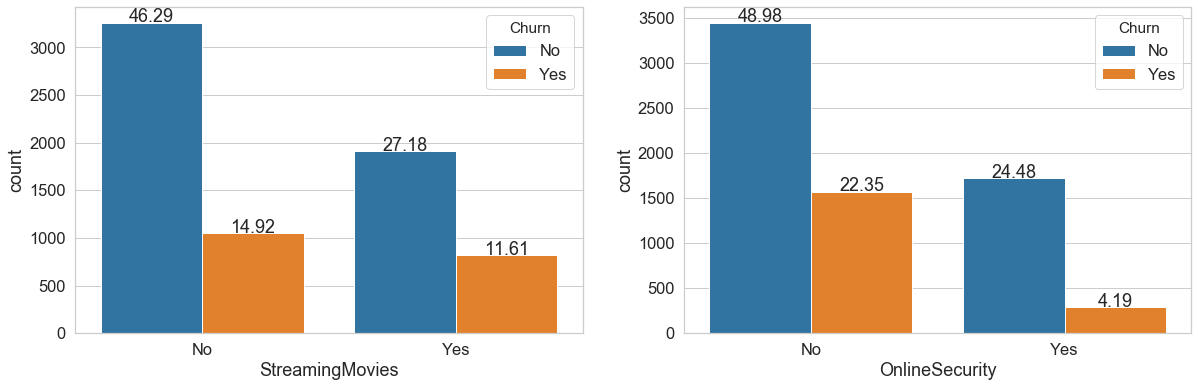

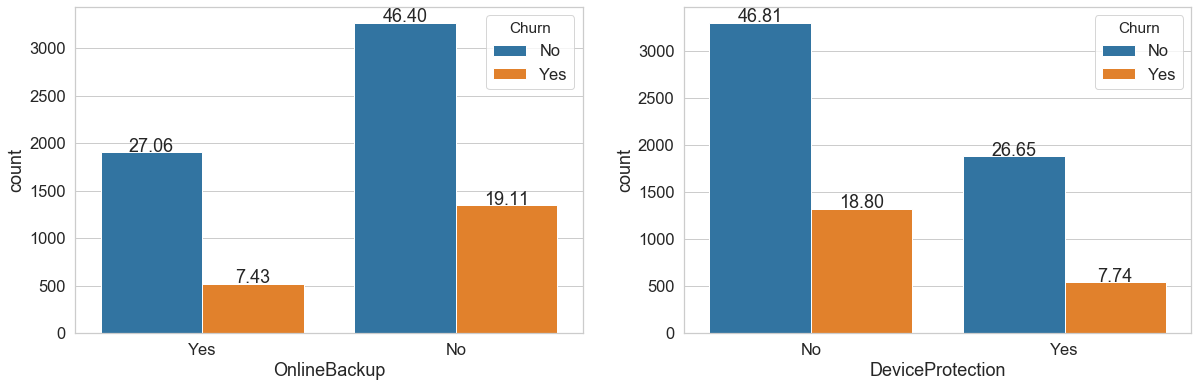

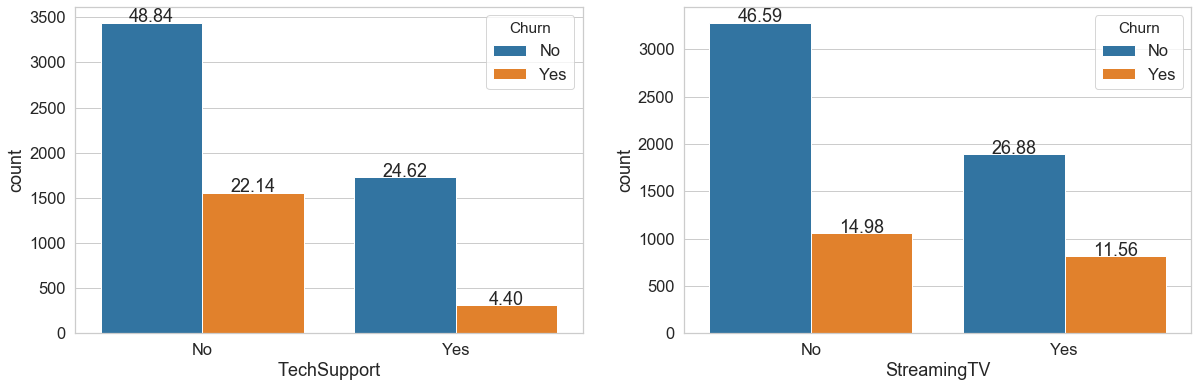

In [26]:
plt.figure(figsize = (160,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5)

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.countplot(data['StreamingMovies'],hue=data['Churn']);
patch(ax,len(data));

plt.subplot(1,2,2)
ax = sns.countplot(data['OnlineSecurity'],hue=data['Churn']);
patch(ax,len(data))

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.countplot(data['OnlineBackup'],hue=data['Churn']);
patch(ax,len(data))

plt.subplot(1,2,2)
ax = sns.countplot(data['DeviceProtection'],hue=data['Churn']);
patch(ax,len(data))

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.countplot(data['TechSupport'],hue=data['Churn']);
patch(ax,len(data))

plt.subplot(1,2,2)
ax = sns.countplot(data['StreamingTV'],hue=data['Churn']);
patch(ax,len(data));

#### We shall bin the tenure column for understanding of data

In [27]:
data['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [28]:
bins = [0,13,37,61,100]
label = ['< 1 year','1-3 years','3-5 years','More than 5 years']
data['tenure_range'] = pd.cut(data['tenure'],bins=bins,labels=label)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,< 1 year
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1-3 years
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,< 1 year
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-5 years
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,< 1 year


In [29]:
data_copy = data.copy()
type(data_copy)

pandas.core.frame.DataFrame

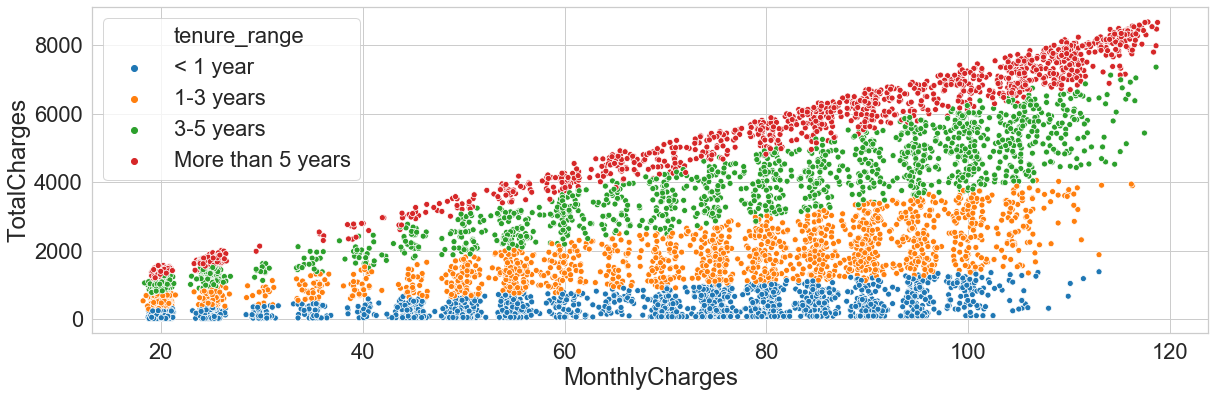

In [30]:
plt.figure(figsize = (20,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=2)

plt.subplot(1,2,1)
sns.scatterplot(y=data['TotalCharges'],x=data['MonthlyCharges'],hue=data['tenure_range']);

plt.subplot(1,2,2)
sns.scatterplot(y=data['TotalCharges'],x=data['MonthlyCharges'],hue=data['tenure_range']);

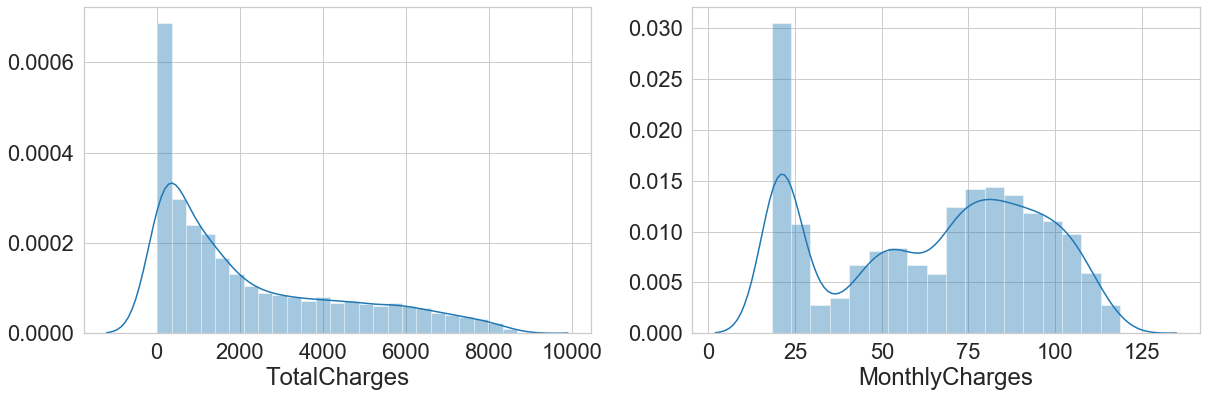

In [31]:
plt.figure(figsize = (20,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=2)

plt.subplot(1,2,1)
sns.distplot(data['TotalCharges']);

plt.subplot(1,2,2)
sns.distplot(data['MonthlyCharges']);

In [32]:
data_copy.drop('Churn',axis = 1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_range
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,< 1 year
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,1-3 years
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,< 1 year
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,3-5 years
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,< 1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,1-3 years
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,More than 5 years
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,< 1 year
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,< 1 year


In [33]:
data_copy['tenure_range'] = data_copy['tenure_range'].astype('O')

In [34]:
## Categorical Variables
cat = [i for i in data_copy.drop('Churn',axis = 1).columns if data_copy[i].dtype =='O']

## Numerical Variables
num = [i for i in data_copy.columns if data_copy[i].dtype!='O']

In [35]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [36]:
bin_col = data_copy[cat].nunique()[data_copy[cat].nunique() == 2].keys().tolist()

multi_col = data_copy[cat].nunique()[data_copy[cat].nunique() != 2].keys().tolist()

In [37]:
bin_col,multi_col,num

(['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'PaperlessBilling'],
 ['MultipleLines',
  'InternetService',
  'Contract',
  'PaymentMethod',
  'tenure_range'],
 ['tenure', 'MonthlyCharges', 'TotalCharges'])

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
encode = LabelEncoder()

In [40]:
for i in bin_col:
    data_copy[i] = encode.fit_transform(data_copy[i])

In [41]:
telecom = pd.get_dummies(data_copy,columns=multi_col)

In [42]:
scale = StandardScaler()
telecom[num] = scale.fit_transform(telecom[num])

In [43]:
telecom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_range_1-3 years,tenure_range_3-5 years,tenure_range_< 1 year,tenure_range_More than 5 years
0,0,0,1,0,-1.277445,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0.066327,1,1,0,1,0,...,1,0,0,0,0,1,1,0,0,0
2,1,0,0,0,-1.236724,1,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0.514251,0,1,0,1,1,...,1,0,1,0,0,0,0,1,0,0
4,0,0,0,0,-1.236724,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [44]:
telecom.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_range_1-3 years,tenure_range_3-5 years,tenure_range_< 1 year,tenure_range_More than 5 years
count,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,5.945991e-17,0.903166,0.286668,0.344881,0.343888,0.290217,...,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880,0.257277,0.227886,0.324294,0.188982
std,0.500013,0.368612,0.499748,0.458110,1.000071e+00,0.295752,0.452237,0.475363,0.475038,0.453895,...,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141,0.437164,0.419498,0.468144,0.391522
min,0.000000,0.000000,0.000000,0.000000,-1.318165e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-9.516817e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,-1.372744e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,9.214551e-01,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.613701e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
x = telecom.drop('Churn',axis=1)
y = data_copy['Churn']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)

In [47]:
logit = LogisticRegression()

In [48]:
log_model = logit.fit(x_train,y_train)

Accuracy Score: 0.8064745137015477


<Figure size 1440x720 with 0 Axes>

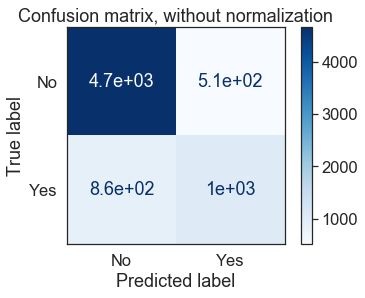

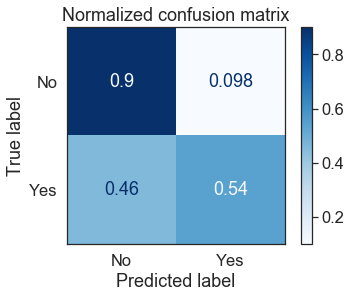

In [53]:
model = logit.fit(x_train,y_train)
y_pred = model.predict(x)

print("Accuracy Score:",accuracy_score(y,model.predict(x)))

plt.figure(figsize=(20, 10))
sns.set_style("white")
sns.set_context("notebook",font_scale=1.5)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x, y,
                                 display_labels=list(y.unique()),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize);
    disp.ax_.set_title(title);

 

    plt.show();

In [68]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

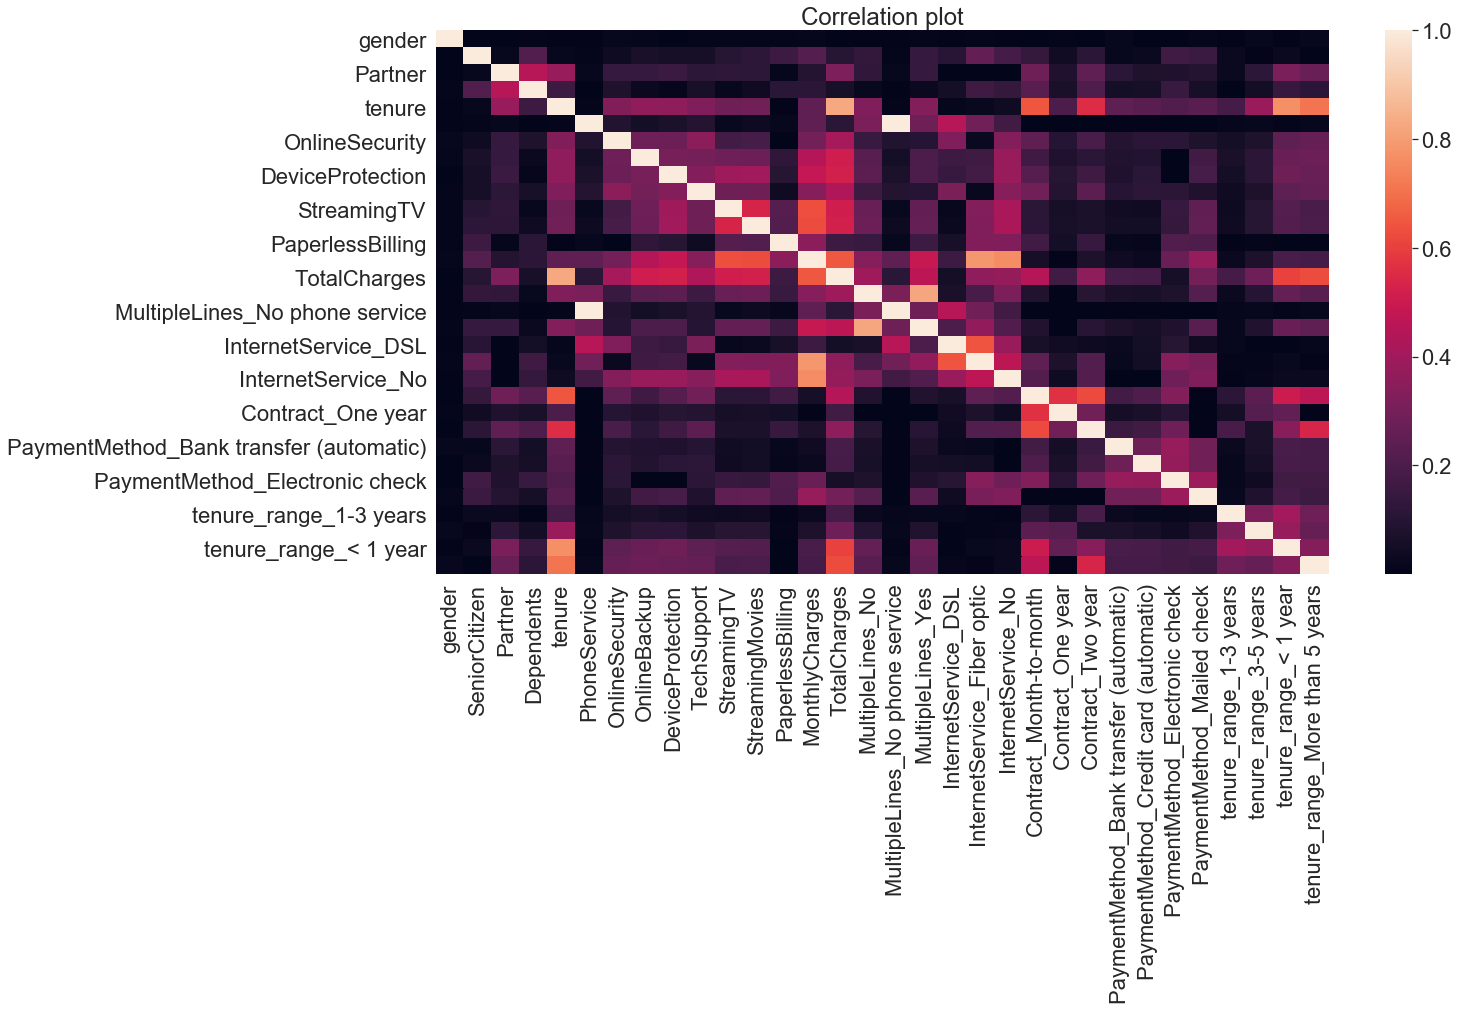

In [67]:
plt.figure(figsize=(20, 10))
sns.set_style("white")
sns.set_context("notebook",font_scale=2)
ax = sns.heatmap(telecom.corr().abs());
ax.set_title("Correlation plot");

Accuracy Score: 0.742439301434048


<Figure size 1440x720 with 0 Axes>

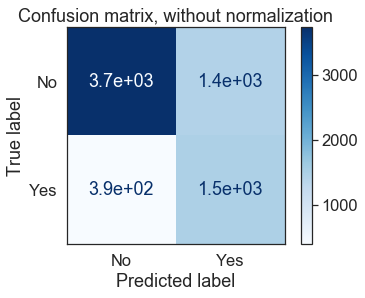

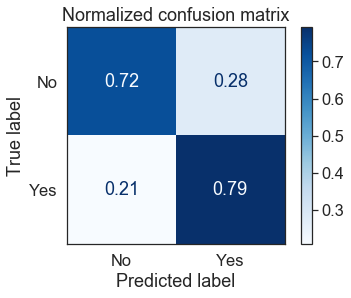

In [63]:
Naive = GaussianNB()
model = Naive.fit(x,y)
y_pred = model.predict(x)

print("Accuracy Score:",accuracy_score(y,model.predict(x)))

plt.figure(figsize=(20, 10))
sns.set_style("white")
sns.set_context("notebook",font_scale=1.5)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x, y,
                                 display_labels=list(y.unique()),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize);
    disp.ax_.set_title(title);

 

    plt.show();

Accuracy Score: 0.8365753230157603


<Figure size 1440x720 with 0 Axes>

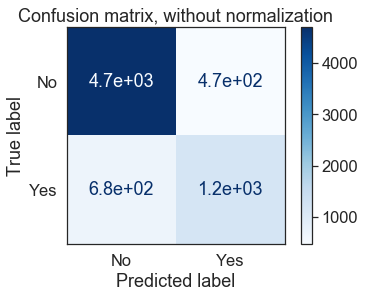

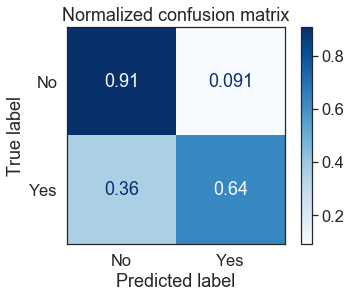

In [54]:
KNN = KNeighborsClassifier()
model = KNN.fit(x,y)
y_pred = model.predict(x)

print("Accuracy Score:",accuracy_score(y,model.predict(x)))

plt.figure(figsize=(20, 10))
sns.set_style("white")
sns.set_context("notebook",font_scale=1.5)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x, y,
                                 display_labels=list(y.unique()),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize);
    disp.ax_.set_title(title);

 

    plt.show();

Accuracy Score: 0.9974442709072838


<Figure size 1440x720 with 0 Axes>

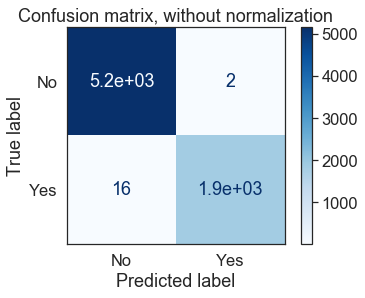

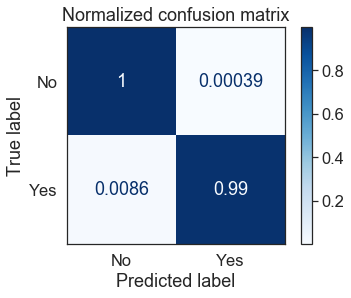

In [55]:
Tree = DecisionTreeClassifier()
model = Tree.fit(x,y)
y_pred = model.predict(x)

print("Accuracy Score:",accuracy_score(y,model.predict(x)))

plt.figure(figsize=(20, 10))
sns.set_style("white")
sns.set_context("notebook",font_scale=1.5)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x, y,
                                 display_labels=list(y.unique()),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize);
    disp.ax_.set_title(title);

 

    plt.show();

Accuracy Score: 0.9974442709072838


<Figure size 1440x720 with 0 Axes>

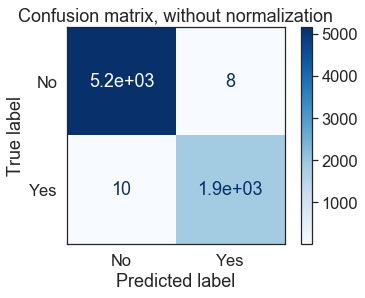

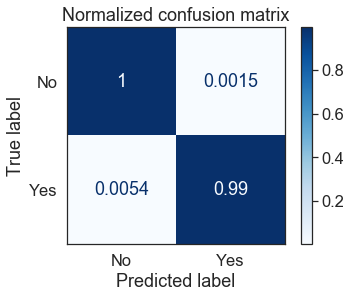

In [56]:
RFC = RandomForestClassifier()
model = RFC.fit(x,y)
y_pred = model.predict(x)

print("Accuracy Score:",accuracy_score(y,model.predict(x)))

plt.figure(figsize=(20, 10))
sns.set_style("white")
sns.set_context("notebook",font_scale=1.5)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x, y,
                                 display_labels=list(y.unique()),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize);
    disp.ax_.set_title(title);

 

    plt.show();

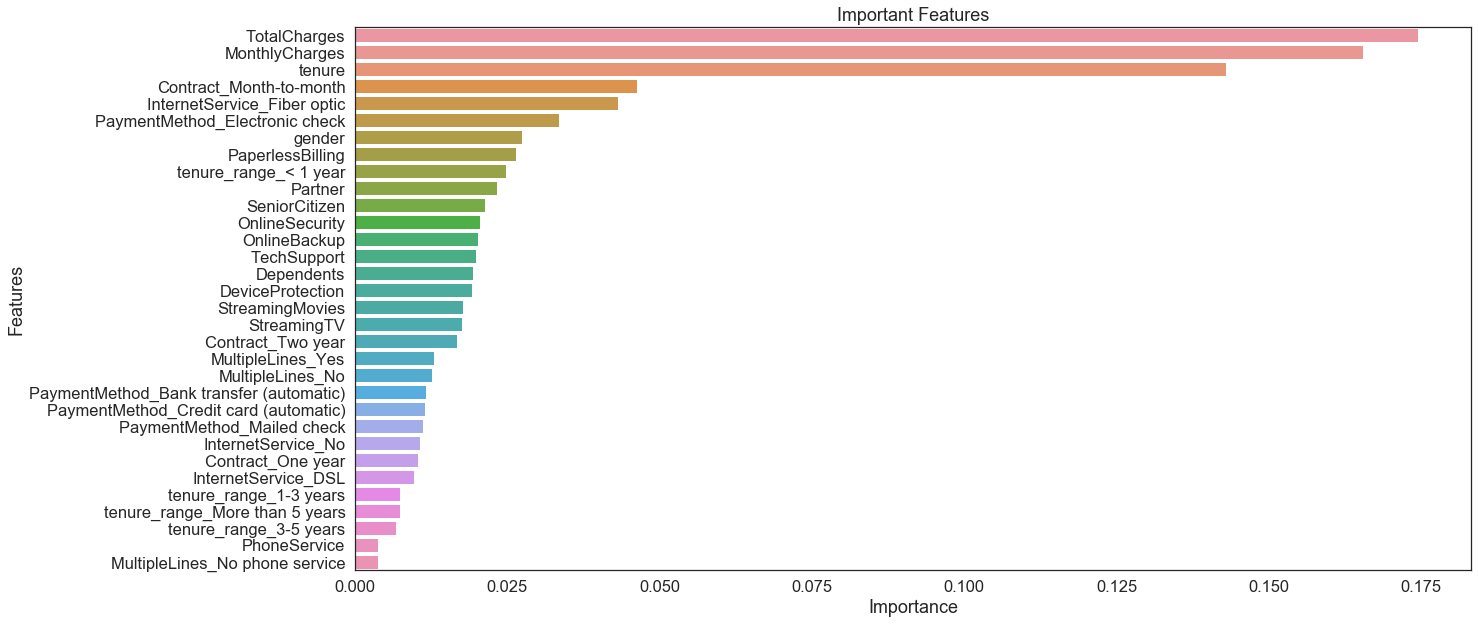

In [59]:
Feature_importance = pd.DataFrame({"Features":x.columns,"Importance":RFC.feature_importances_})
Feature_importance.sort_values(by=['Importance'],ascending=False,inplace=True)

plt.figure(figsize=(20,10))
ax = sns.barplot(x='Importance',y='Features',data = Feature_importance);
ax.set_title("Important Features");